In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

sns.set_context('paper')
sns.color_palette('muted')
%matplotlib inline

# Import data

In [2]:
trk = pd.read_json('../data/track_df.json')
print(trk.dtypes)
trk.head(10)

added_at       datetime64[ns]
artist                 object
duration              float64
explicit              float64
id                     object
name                   object
playlist_id            object
popularity            float64
dtype: object


,added_at,artist,duration,explicit,id,name,playlist_id,popularity
0,2013-09-30 16:12:24,Allgott & Villgott,119907.0,0.0,3aIptaHMnbIXRxPWKlqwc6,Klappa lamm,3ftsSOkyCsILZeAZYQr2jH,2.0
1,2013-10-05 15:22:13,Allgott & Villgott,67918.0,0.0,0rPBlDWP6wcfax63Vs8nAF,Hej på dej,3ftsSOkyCsILZeAZYQr2jH,4.0
10,2014-07-16 13:50:24,J Boog,217270.0,0.0,4RjHalDdUreXDJSJLo44lK,Sunshine Girl,35XFuuqgCvTYQARix7CFpm,53.0
100,2014-07-06 09:12:01,Brennan Heart,222919.0,0.0,6A04TZRVZw8db1VsHeYOEx,Never Break Me - Toneshifterz Remix,0gGfciue2ZDCOG5uMv46gU,0.0
1000,2012-06-29 11:53:52,Johnny Ray,153375.0,0.0,1k4p7c69Dkh2b7s813ooR8,"Yes Tonight, Josephine",6Tuex6CIDfZRyRtsmb5rwE,0.0
10000,2016-10-19 08:47:35,Hurula,220929.0,0.0,69UN0GDw1dvmE3YxGJ0HUy,Helvete här,5xL1c6RCMhVDTVLZUsY5SR,41.0
100000,2014-08-04 16:09:48,Becky G,206166.0,0.0,3DmW6y7wTEYHJZlLo1r6XJ,Shower,5BASWniNjjZADnD9i96L45,70.0
100001,2013-08-03 17:10:52,Elton John,290680.0,0.0,1DqMnZpdOXy4mjmsXnFv2t,Circle Of Life,6uSxJmUwlS3RqjGEA0TRq8,4.0
100002,2013-09-10 14:11:36,Daniel Adams-Ray,231013.0,0.0,1qIAqSCPcRkkNU8dj5pIOC,Gubben i lådan,6Y81KUgVKTPUYHO05A2Sqr,53.0
100003,2017-08-20 10:53:49,Tony! Toni! Toné!,241466.0,0.0,0HsTJZWuj9vY7Ns0If1ARm,If I Had No Loot,0mEm0SZ7WsnI3w8ycnO6ue,37.0


In [3]:
pl = pd.read_json('../data/plist_df.json')
print(pl.dtypes)
pl.head(10)

collab           bool
desc           object
followers     float64
id             object
name           object
num_tracks      int64
user           object
dtype: object


,collab,desc,followers,id,name,num_tracks,user
0,False,None,2.0,3ftsSOkyCsILZeAZYQr2jH,Allgott o villgott,6,ellenholstad
1,False,None,0.0,27NLrsj0rlUi9S9Buj7NEl,Emelie och Nelli,9,ellenholstad
10,False,None,9.0,2DVuNt17JxlUUwP8VbjYMZ,Dame mas chocolinas,54,maka_97
100,False,None,22.0,07nCTAAPUQl3O9835StlnA,Miami Morty 💎🍭💸💘,46,thefamousnobody
1000,False,None,0.0,2nLFBeJkALxMcmYHqOnBAE,Michael Bublé – Call Me Irresponsible,13,vimmel76
1001,False,None,4.0,3kCN0aICbIUs7RjgVK00s6,Mornings with Angel,58,1177637361
1002,False,None,0.0,6xIePScn5oFe1XC1XZMRpm,One Direction — Olivia,3,blake.binns
1003,False,None,0.0,7H9SO2xfI394iVQLNXvO63,svensksommar,79,vimmel76
1004,False,None,0.0,2wHiKFc66l2W05tO2iBNMe,rosario,40,vimmel76
1005,False,None,0.0,1HA2U1AKqHBjDT7DcCHlqR,rosa passos,115,vimmel76


# Data wrangling - Spotify set

Before we import any external data sets, let's add some relevant data features that are inherit in the trk and pl dataframes:

In [4]:
# Wrangling track dataframe

# Make explicit column headers to avoid confusion when we merge with playlist track
trk = trk.rename(columns = {'name':'trk_name', 'id':'trk_id', 'playlist_id':'pl_id', 'artist':'art_name', 'popularity':'trk_popularity'})

# Some popuarity numbers are NaN.  Remove them.
trk = trk.dropna(subset = ['trk_popularity'])

# Add additional data to the trk df for import into the pl df
# NOTE THIS CELL COULD TAKE A FEW MINUTES TO RUN

# Oldest and newest date that a track was added to the playlist
trk['pl_first_date'] = trk.groupby('pl_id')['added_at'].transform('min')
trk['pl_last_date'] = trk.groupby('pl_id')['added_at'].transform('max')
trk['pl_days_active'] = trk['pl_last_date'] - trk['pl_first_date']

# Number of tracks in the playlist
trk['pl_num_trk'] = trk.groupby('pl_id')['trk_id'].transform('count')

# Number of artists in the playlist
trk['pl_num_art'] = trk.groupby('pl_id')['art_name'].transform('nunique')

# Max, min, and average track popularity (by playlist)
trk['pl_min_trkpop'] = trk.groupby('pl_id')['trk_popularity'].transform('min')
trk['pl_max_trkpop'] = trk.groupby('pl_id')['trk_popularity'].transform('max')
trk['pl_mean_trkpop'] = trk.groupby('pl_id')['trk_popularity'].transform('mean')

trk['art_min_trkpop'] = trk.groupby('art_name')['trk_popularity'].transform('min')
trk['art_max_trkpop'] = trk.groupby('art_name')['trk_popularity'].transform('max')
trk['art_mean_trkpop'] = trk.groupby('art_name')['trk_popularity'].transform('mean')
trk['art_total_trks'] = trk.groupby('art_name')['trk_name'].transform('nunique').astype('int')

# Add a label category for each artist (currently just 5 labels but could be expanded)
trk['art_class'] = ""
trk.loc[(trk.art_mean_trkpop>=40) & (trk.art_total_trks>=5), 'art_class'] = 'superstar'
trk.loc[(trk.art_mean_trkpop>=20) & (trk.art_mean_trkpop<40) & (trk.art_total_trks>=5), 'art_class'] = 'star'
trk.loc[(trk.art_mean_trkpop>=0) & (trk.art_mean_trkpop<20) & (trk.art_total_trks>=5), 'art_class'] = 'crap_factory'
trk.loc[(trk.art_mean_trkpop>=40) & (trk.art_total_trks<5), 'art_class'] = 'one_hit_wonder'
trk.loc[(trk.art_mean_trkpop<40) & (trk.art_total_trks<5), 'art_class'] = 'garage_band'
trk['art_class'] = pd.Categorical(trk['art_class'], categories=["superstar","star","crap_factory", "one_hit_wonder", "garage_band"])

trk.head(10)

,added_at,art_name,duration,explicit,trk_id,trk_name,pl_id,trk_popularity,pl_first_date,pl_last_date,...,pl_num_trk,pl_num_art,pl_min_trkpop,pl_max_trkpop,pl_mean_trkpop,art_min_trkpop,art_max_trkpop,art_mean_trkpop,art_total_trks,art_class
0,2013-09-30 16:12:24,Allgott & Villgott,119907.0,0.0,3aIptaHMnbIXRxPWKlqwc6,Klappa lamm,3ftsSOkyCsILZeAZYQr2jH,2.0,2013-09-30 16:12:24,2013-10-05 15:22:46,...,6,1,0.0,4.0,1.333333,0.0,6.0,1.764706,13,crap_factory
1,2013-10-05 15:22:13,Allgott & Villgott,67918.0,0.0,0rPBlDWP6wcfax63Vs8nAF,Hej på dej,3ftsSOkyCsILZeAZYQr2jH,4.0,2013-09-30 16:12:24,2013-10-05 15:22:46,...,6,1,0.0,4.0,1.333333,0.0,6.0,1.764706,13,crap_factory
10,2014-07-16 13:50:24,J Boog,217270.0,0.0,4RjHalDdUreXDJSJLo44lK,Sunshine Girl,35XFuuqgCvTYQARix7CFpm,53.0,2014-07-16 13:48:05,2014-07-19 14:56:45,...,26,16,0.0,72.0,38.269231,0.0,58.0,38.419355,20,star
100,2014-07-06 09:12:01,Brennan Heart,222919.0,0.0,6A04TZRVZw8db1VsHeYOEx,Never Break Me - Toneshifterz Remix,0gGfciue2ZDCOG5uMv46gU,0.0,2014-06-21 10:38:02,2014-10-21 12:14:31,...,100,40,0.0,58.0,15.510000,0.0,47.0,11.272727,18,crap_factory
1000,2012-06-29 11:53:52,Johnny Ray,153375.0,0.0,1k4p7c69Dkh2b7s813ooR8,"Yes Tonight, Josephine",6Tuex6CIDfZRyRtsmb5rwE,0.0,2012-06-29 11:52:21,2012-06-29 11:54:37,...,100,70,0.0,0.0,0.000000,0.0,0.0,0.000000,1,garage_band
10000,2016-10-19 08:47:35,Hurula,220929.0,0.0,69UN0GDw1dvmE3YxGJ0HUy,Helvete här,5xL1c6RCMhVDTVLZUsY5SR,41.0,2015-09-18 08:41:56,2017-11-23 18:34:31,...,100,93,0.0,71.0,32.370000,41.0,41.0,41.000000,1,one_hit_wonder
100000,2014-08-04 16:09:48,Becky G,206166.0,0.0,3DmW6y7wTEYHJZlLo1r6XJ,Shower,5BASWniNjjZADnD9i96L45,70.0,2014-08-04 15:57:46,2016-07-13 09:05:04,...,26,23,0.0,72.0,35.769231,49.0,91.0,78.289474,12,superstar
100001,2013-08-03 17:10:52,Elton John,290680.0,0.0,1DqMnZpdOXy4mjmsXnFv2t,Circle Of Life,6uSxJmUwlS3RqjGEA0TRq8,4.0,2013-08-03 17:10:52,2013-08-03 17:17:05,...,31,1,0.0,53.0,32.096774,0.0,71.0,45.176471,76,superstar
100002,2013-09-10 14:11:36,Daniel Adams-Ray,231013.0,0.0,1qIAqSCPcRkkNU8dj5pIOC,Gubben i lådan,6Y81KUgVKTPUYHO05A2Sqr,53.0,2013-09-10 14:01:53,2013-09-30 14:01:27,...,58,20,0.0,74.0,41.120690,1.0,53.0,41.636364,5,superstar
100003,2017-08-20 10:53:49,Tony! Toni! Toné!,241466.0,0.0,0HsTJZWuj9vY7Ns0If1ARm,If I Had No Loot,0mEm0SZ7WsnI3w8ycnO6ue,37.0,2017-06-19 11:57:09,2017-11-19 03:01:16,...,100,74,7.0,78.0,51.510000,6.0,56.0,43.454545,8,superstar


In [5]:
# Wrangling playlist dataframe

# Make explicit column headers to avoid confusion when we merge with playlist track
pl = pl.rename(columns = {'name':'pl_name', 'id':'pl_id', 'followers':'pl_followers', 'num_tracks':'pl_num_trks', 'user':'pl_owner'})

# We have one null follower count.  Drop it
pl = pl.dropna(subset = ['pl_followers'])

# Fix followers to int
pl['pl_followers'] = pl.loc[:,'pl_followers'].astype('int')

# Number of playlists per user
pl['user_pls_in_sample'] = pl.groupby('pl_owner')['pl_id'].transform('count')

# Size number of characters in the playlist description
pl['pl_desc_chars'] = pl.desc.str.len().fillna(0).astype('int')


pl.head(10)

,collab,desc,pl_followers,pl_id,pl_name,pl_num_trks,pl_owner,user_pls_in_sample,pl_desc_chars
0,False,None,2,3ftsSOkyCsILZeAZYQr2jH,Allgott o villgott,6,ellenholstad,19,0
1,False,None,0,27NLrsj0rlUi9S9Buj7NEl,Emelie och Nelli,9,ellenholstad,19,0
10,False,None,9,2DVuNt17JxlUUwP8VbjYMZ,Dame mas chocolinas,54,maka_97,9,0
100,False,None,22,07nCTAAPUQl3O9835StlnA,Miami Morty 💎🍭💸💘,46,thefamousnobody,17,0
1000,False,None,0,2nLFBeJkALxMcmYHqOnBAE,Michael Bublé – Call Me Irresponsible,13,vimmel76,18,0
1001,False,None,4,3kCN0aICbIUs7RjgVK00s6,Mornings with Angel,58,1177637361,17,0
1002,False,None,0,6xIePScn5oFe1XC1XZMRpm,One Direction — Olivia,3,blake.binns,19,0
1003,False,None,0,7H9SO2xfI394iVQLNXvO63,svensksommar,79,vimmel76,18,0
1004,False,None,0,2wHiKFc66l2W05tO2iBNMe,rosario,40,vimmel76,18,0
1005,False,None,0,1HA2U1AKqHBjDT7DcCHlqR,rosa passos,115,vimmel76,18,0


# Combine playlist and track dataframes

In [6]:
# Merge the two datasets.  Note that 33 playlists in trk do not appear in pl - dropping them
df_trk = pd.merge(left = trk, right = pl, on = 'pl_id', how = 'left').dropna(subset = ['pl_followers'])
print("Track DF has total of {0} rows (including zero followers)".format(df_trk.shape[0]))

# Cut out the zero follower playlists
df_trk = df_trk[df_trk['pl_followers'] > 0]
print("Track DF has total of {0} rows (after removing zero followers) \n".format(df_trk.shape[0]))

print(df_trk.dtypes)
df_trk.head(10)

Track DF has total of 367911 rows (including zero followers)
Track DF has total of 256657 rows (after removing zero followers) 

added_at               datetime64[ns]
art_name                       object
duration                      float64
explicit                      float64
trk_id                         object
trk_name                       object
pl_id                          object
trk_popularity                float64
pl_first_date          datetime64[ns]
pl_last_date           datetime64[ns]
pl_days_active        timedelta64[ns]
pl_num_trk                      int64
pl_num_art                      int64
pl_min_trkpop                 float64
pl_max_trkpop                 float64
pl_mean_trkpop                float64
art_min_trkpop                float64
art_max_trkpop                float64
art_mean_trkpop               float64
art_total_trks                  int32
art_class                    category
collab                         object
desc                           obje

,added_at,art_name,duration,explicit,trk_id,trk_name,pl_id,trk_popularity,pl_first_date,pl_last_date,...,art_total_trks,art_class,collab,desc,pl_followers,pl_name,pl_num_trks,pl_owner,user_pls_in_sample,pl_desc_chars
0,2013-09-30 16:12:24,Allgott & Villgott,119907.0,0.0,3aIptaHMnbIXRxPWKlqwc6,Klappa lamm,3ftsSOkyCsILZeAZYQr2jH,2.0,2013-09-30 16:12:24,2013-10-05 15:22:46,...,13,crap_factory,False,None,2.0,Allgott o villgott,6.0,ellenholstad,19.0,0.0
1,2013-10-05 15:22:13,Allgott & Villgott,67918.0,0.0,0rPBlDWP6wcfax63Vs8nAF,Hej på dej,3ftsSOkyCsILZeAZYQr2jH,4.0,2013-09-30 16:12:24,2013-10-05 15:22:46,...,13,crap_factory,False,None,2.0,Allgott o villgott,6.0,ellenholstad,19.0,0.0
2,2014-07-16 13:50:24,J Boog,217270.0,0.0,4RjHalDdUreXDJSJLo44lK,Sunshine Girl,35XFuuqgCvTYQARix7CFpm,53.0,2014-07-16 13:48:05,2014-07-19 14:56:45,...,20,star,False,None,1.0,reggae,26.0,denniswolf1992,3.0,0.0
3,2014-07-06 09:12:01,Brennan Heart,222919.0,0.0,6A04TZRVZw8db1VsHeYOEx,Never Break Me - Toneshifterz Remix,0gGfciue2ZDCOG5uMv46gU,0.0,2014-06-21 10:38:02,2014-10-21 12:14:31,...,18,crap_factory,False,None,1921.0,Ηardstyle♬ WORLD OF HARDSTYLE | Wildstylez | N...,282.0,denniswolf1992,3.0,0.0
4,2012-06-29 11:53:52,Johnny Ray,153375.0,0.0,1k4p7c69Dkh2b7s813ooR8,"Yes Tonight, Josephine",6Tuex6CIDfZRyRtsmb5rwE,0.0,2012-06-29 11:52:21,2012-06-29 11:54:37,...,1,garage_band,False,None,12.0,50's Jukebox Hits,329.0,1121819432,20.0,0.0
5,2016-10-19 08:47:35,Hurula,220929.0,0.0,69UN0GDw1dvmE3YxGJ0HUy,Helvete här,5xL1c6RCMhVDTVLZUsY5SR,41.0,2015-09-18 08:41:56,2017-11-23 18:34:31,...,1,one_hit_wonder,False,Tina Mehrafzoon leder dig genom allt nytt av v...,987.0,Tina Mehrafzoon - Favoriter,264.0,p3_sverigesradio,20.0,294.0
6,2014-08-04 16:09:48,Becky G,206166.0,0.0,3DmW6y7wTEYHJZlLo1r6XJ,Shower,5BASWniNjjZADnD9i96L45,70.0,2014-08-04 15:57:46,2016-07-13 09:05:04,...,12,superstar,False,None,43.0,LIL'BITCH,26.0,thomasaunier,13.0,0.0
9,2017-08-20 10:53:49,Tony! Toni! Toné!,241466.0,0.0,0HsTJZWuj9vY7Ns0If1ARm,If I Had No Loot,0mEm0SZ7WsnI3w8ycnO6ue,37.0,2017-06-19 11:57:09,2017-11-19 03:01:16,...,8,superstar,False,All the hits that all Batang &#x27;90s loved l...,7.0,The Fantastic '90s,127.0,1177637361,17.0,73.0
10,2017-10-17 10:52:54,CNCO,205520.0,0.0,209gZgcfLq2aUuu51vOWBl,Hey DJ,66WFalGuFXfed3D87cFGzA,86.0,2017-10-17 10:52:54,2017-11-24 11:09:08,...,20,superstar,False,"Reggaeton 2017 con temas como Becky G, Bad Bun...",46335.0,A mi me gustan mayores,65.0,pacificspain,19.0,271.0
11,2014-08-19 21:34:47,Meghan Trainor,188754.0,0.0,0ifSeVGUr7py5GggttDhXw,All About That Bass,5BASWniNjjZADnD9i96L45,68.0,2014-08-04 15:57:46,2016-07-13 09:05:04,...,36,superstar,False,None,43.0,LIL'BITCH,26.0,thomasaunier,13.0,0.0


In [20]:
# Let's make a pl subset as we'll use this often for EDA.  
# Note that some of the values here are not valid (anything that varies by track such as artist)
# !!! To do: remove the unusable columns in here (or just rebuild df_pl with a reverse join)
df_pl = df_trk.groupby('pl_id').first().reset_index()

print(df_pl.dtypes)

pl_id                          object
added_at               datetime64[ns]
art_name                       object
duration                      float64
explicit                      float64
trk_id                         object
trk_name                       object
trk_popularity                float64
pl_first_date          datetime64[ns]
pl_last_date           datetime64[ns]
pl_days_active        timedelta64[ns]
pl_num_trk                      int64
pl_num_art                      int64
pl_min_trkpop                 float64
pl_max_trkpop                 float64
pl_mean_trkpop                float64
art_min_trkpop                float64
art_max_trkpop                float64
art_mean_trkpop               float64
art_total_trks                  int32
art_class                      object
collab                           bool
desc                           object
pl_followers                  float64
pl_name                        object
pl_num_trks                   float64
pl_owner    

# Now let's get our EDA ON BABY

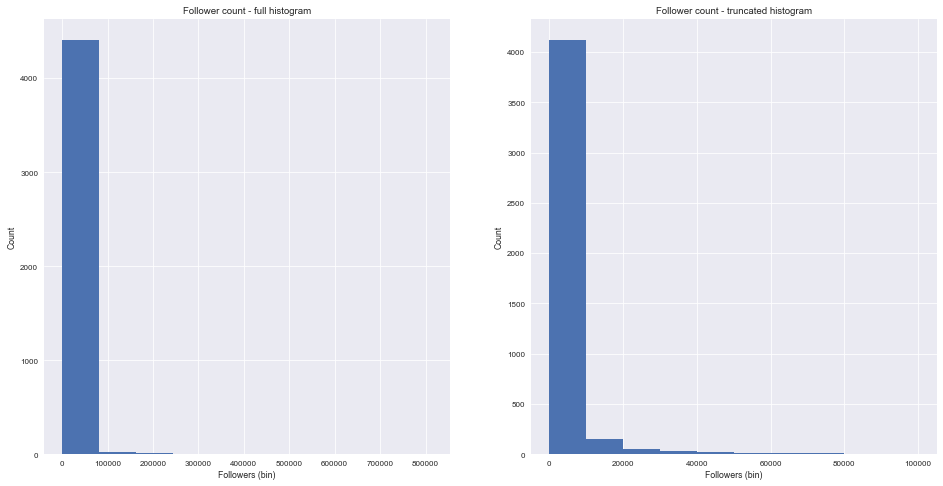

In [8]:
# Plot histogram of follower counts for each playlist
fig, ax = plt.subplots(1,2, figsize = (16,8))
ax[0].hist(df_trk.groupby('pl_id').pl_followers.first().values)
ax[0].set_title("Follower count - full histogram")
ax[0].set_xlabel("Followers (bin)")
ax[0].set_ylabel("Count")

ax[1].hist(df_trk.groupby('pl_id').pl_followers.first().values, range = (0,100000))
ax[1].set_title("Follower count - truncated histogram")
ax[1].set_xlabel("Followers (bin)")
ax[1].set_ylabel("Count")

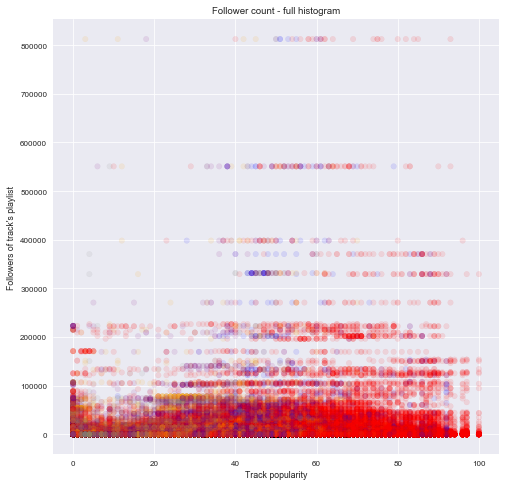

In [14]:
# Plot follower count vs. average track popularity
fig, ax = plt.subplots(1,1, figsize = (8,8))

colors = {'superstar':'red', 'star':'orange', 'crap_factory':'grey', 'one_hit_wonder':'blue', 'garage_band':'purple'}

ax.scatter(df_trk['trk_popularity'], df_trk['pl_followers'], alpha = 0.1, c=df_trk['art_class'].apply(lambda x: colors[x]))
ax.set_title("Follower count - full histogram")
ax.set_xlabel("Track popularity")
ax.set_ylabel("Followers of track's playlist")

(0, 250)

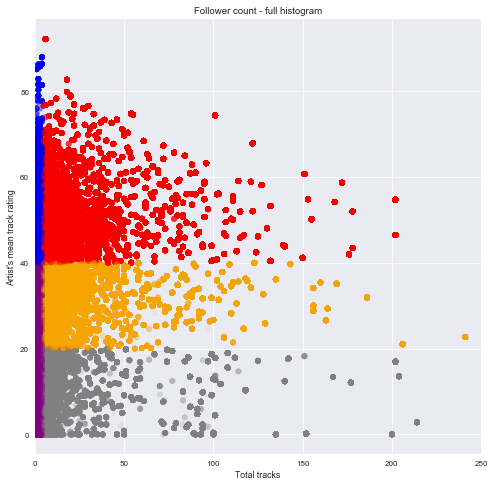

In [40]:
# Plot follower count vs. average track popularity
fig, ax = plt.subplots(1,1, figsize = (8,8))

colors = {'superstar':'red', 'star':'orange', 'crap_factory':'grey', 'one_hit_wonder':'blue', 'garage_band':'purple'}

ax.scatter(df_trk.art_total_trks, df_trk.art_mean_trkpop, alpha = 0.1, c=df_trk['art_class'].apply(lambda x: colors[x]))
ax.set_title("Follower count - full histogram")
ax.set_xlabel("Total tracks")
ax.set_ylabel("Artist's mean track rating")
plt.xlim((0,250))

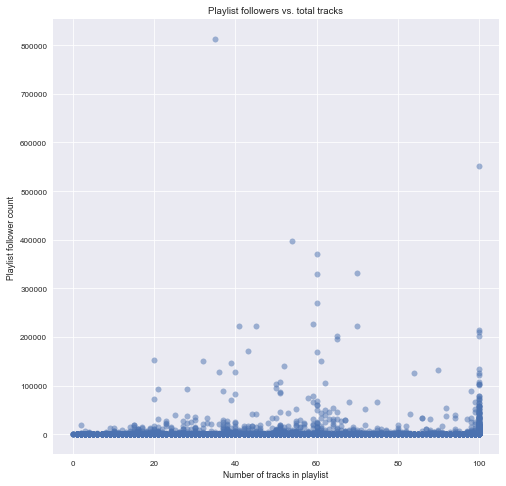

In [26]:
# See if bigger playlists have more followers
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.scatter(df_pl.pl_num_trk, df_pl.pl_followers, alpha = 0.5)
ax.set_title("Playlist followers vs. total tracks")
ax.set_xlabel("Number of tracks in playlist")
ax.set_ylabel("Playlist follower count")

(0, 500)

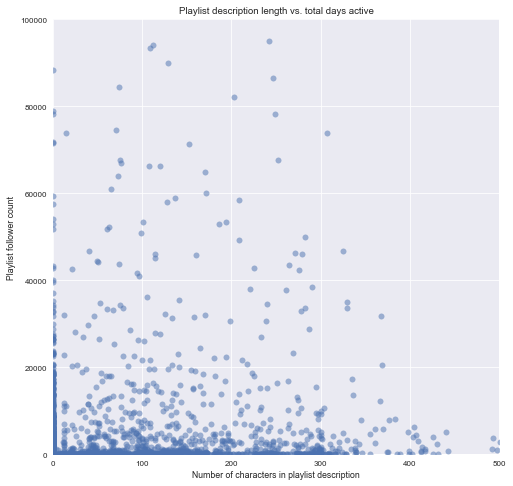

In [39]:
# See if longer-running playlists have more followers
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.scatter(df_pl.pl_desc_chars, df_pl.pl_followers, alpha = 0.5)
ax.set_title("Playlist description length vs. total days active")
ax.set_xlabel("Number of characters in playlist description")
ax.set_ylabel("Playlist follower count")
ax.set_ylim((0,100000))
ax.set_xlim((0,500))